<a href="https://colab.research.google.com/github/am4279/Chicago_News_Analysis/blob/main/Chicago_Article_Level_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Applying model to Chicago Data

In [9]:
import pandas as pd


In [ ]:

DATA_PATH = '/content/drive/MyDrive/news_chicago_il.json'
df = pd.read_json(DATA_PATH, orient='records', lines=True)
#data = pd.read_csv(DATA_PATH)
df.shape

In [ ]:
df.head(50)

,crawled_date,language,text,title
0,1623283200000,english,Fill in your details below or click an icon to...,Howard Majors—Chicago (1913)
1,1623283200000,english,Chicago Woman Warns Others After Car She Purch...,Chicago Woman Warns Others After Car She Purch...
2,1623283200000,english,Moon Alert Caution! Avoid shopping or making i...,"Horoscope for Thursday, June 10, 2021 - Chicag..."
3,1623283200000,english,Illinois State Tax Chart - Sales Tax Chart Ill...,illinois state tax chart
4,1623283200000,english,Illinois State Budget Pie Chart - Heres Where ...,illinois state budget pie chart
5,1623283200000,english,Short Preview Limited number of spectators. Du...,"Chicago White Sox – Toronto Blue Jays, Jun 10,..."
6,1623283200000,english,Chicago Weather: Patchy Fog In The Morning\nCB...,Chicago Weather: Patchy Fog In The Morning
7,1623283200000,english,"excellent service, menu and food",Truluck's - Ocean's Finest Seafood & Crab - Do...
8,1623283200000,english,We asked to be moved to another table just bec...,"Paradise Park Chicago - Chicago, IL"
9,1623283200000,english,Great food! Loved the Spicy Tuna Tartare and t...,"The Smith - Chicago - Chicago, IL"


####Loading Ktrain

In [ ]:
#df['Sentence_Tokens'] = df['Violations'].apply(lambda words: re.split("\s[|]\s", words))
#!pip install ktrain

In [ ]:
import ktrain
from ktrain import text

In [ ]:
predictor = ktrain.load_predictor('/content/drive/MyDrive/bigru_yelp_predictor')


# Sentiment Analysis on full article
#### This is a pre-run before I do it by sentence level

In [ ]:
# data will = 'text'


NumRecs = len(df)

#target = df.target.iloc[0:NumRecs]
predicted = predictor.predict(df.text.iloc[0:NumRecs].tolist())
data = df.text.iloc[0:NumRecs]

results = pd.DataFrame(list(zip(predicted, data)), 
               columns =['predicted', 'data']) 

In [ ]:
pd.set_option('max_colwidth', 100)

results.head(10)

,predicted,data
0,Negative,Fill in your details below or click an icon to log in: Email (required) (Address never made publ...
1,Negative,Chicago Woman Warns Others After Car She Purchased Online Was Reported Stolen – NBC Chicago » Sc...
2,Negative,Moon Alert Caution! Avoid shopping or making important decisions after 12:30 p.m. Chicago time. ...
3,Negative,Illinois State Tax Chart - Sales Tax Chart Illinois The Sales Tax Rate Is Illinois Is 625\nSales...
4,Negative,Illinois State Budget Pie Chart - Heres Where Your Illinois Tax Dollars Go News Local State\nHer...
5,Negative,Short Preview Limited number of spectators. During this match we will see a game between leader ...
6,Negative,Chicago Weather: Patchy Fog In The Morning\nCBS 2 Meteorologist Mary Kay Kleist has your 10 p.m....
7,Negative,"excellent service, menu and food"
8,Negative,We asked to be moved to another table just because the sun was a bit too much on us & the waitre...
9,Negative,Great food! Loved the Spicy Tuna Tartare and the Pork Milanese especially!


In [ ]:
#results.to_json('/content/drive/MyDrive/full_art_sent_chicago_news1.json', orient='records', lines=True)

In [62]:
DATA_PATH = '/content/drive/MyDrive/full_art_sent_chicago_news.json'
results = pd.read_json(DATA_PATH, orient='records', lines=True)
#data = pd.read_csv(DATA_PATH)
results.shape

(439835, 2)

In [63]:
results

,predicted,data
0,Negative,Fill in your details below or click an icon to...
1,Negative,Chicago Woman Warns Others After Car She Purch...
2,Negative,Moon Alert Caution! Avoid shopping or making i...
3,Negative,Illinois State Tax Chart - Sales Tax Chart Ill...
4,Negative,Illinois State Budget Pie Chart - Heres Where ...
...,...,...
439830,Negative,Do Illinois laws encourage corruption-prone ut...
439831,Negative,Pritzker's orders face more legal challenges\n...
439832,Negative,It was the first court appearance in Wisconsin...
439833,Positive,Incredible Brownstone Apartment ~ Suite 3 ~ In...


In [64]:
neg_Chi_df = results[(results['predicted']=='Negative')]
pos_Chi_df = results[(results['predicted']=='Positive')]

In [ ]:
neg_Chi_df

,predicted,data
0,Negative,Fill in your details below or click an icon to...
1,Negative,Chicago Woman Warns Others After Car She Purch...
2,Negative,Moon Alert Caution! Avoid shopping or making i...
3,Negative,Illinois State Tax Chart - Sales Tax Chart Ill...
4,Negative,Illinois State Budget Pie Chart - Heres Where ...
...,...,...
439829,Negative,More than 42 percent of registered Illinois vo...
439830,Negative,Do Illinois laws encourage corruption-prone ut...
439831,Negative,Pritzker's orders face more legal challenges\n...
439832,Negative,It was the first court appearance in Wisconsin...


In [ ]:
pos_Chi_df

,predicted,data
7,Positive,"excellent service, menu and food"
9,Positive,Great food! Loved the Spicy Tuna Tartare and t...
10,Positive,Abraham Lincoln is in the wrestling hall of fa...
12,Positive,Great selection of pizzas as well as other Ita...
17,Positive,Ambiance is breathtaking!
...,...,...
439817,Positive,Fanny McFarlane search heparin: Buy heparin us...
439818,Positive,"Booze is one of those industries, like cars an..."
439821,Positive,"Newman SPRINGFIELD, Ill. — Everytown for Gun S..."
439827,Positive,"NWNAdmin\nNetworthy Newz, putting our spin on ..."


In [ ]:
neg_Chi_df.to_json('/content/drive/MyDrive/neg_sent_chicago_news1.json', orient='records', lines=True)

In [ ]:
pos_Chi_df.to_json('/content/drive/MyDrive/pos_sent_chicago_news1.json', orient='records', lines=True)

## Keyword Extraction on Negative Sentiment Articles 

In [ ]:
POS_DATA_PATH = '/content/drive/MyDrive/pos_sent_chicago_news1.json'
pos_Chi_df = pd.read_json(DATA_PATH, orient='records', lines=True)
#data = pd.read_csv(DATA_PATH)
pos_Chi_df.shape

(439835, 4)

In [ ]:
#pos_Chi_df

In [11]:
NEG_DATA_PATH = '/content/drive/MyDrive/neg_sent_chicago_news1.json'
neg_Chi_df = pd.read_json(NEG_DATA_PATH, orient='records', lines=True)
#data = pd.read_csv(DATA_PATH)
neg_Chi_df.shape

(286305, 2)

In [12]:
neg_Chi_df

,predicted,data
0,Negative,Fill in your details below or click an icon to...
1,Negative,Chicago Woman Warns Others After Car She Purch...
2,Negative,Moon Alert Caution! Avoid shopping or making i...
3,Negative,Illinois State Tax Chart - Sales Tax Chart Ill...
4,Negative,Illinois State Budget Pie Chart - Heres Where ...
...,...,...
286300,Negative,More than 42 percent of registered Illinois vo...
286301,Negative,Do Illinois laws encourage corruption-prone ut...
286302,Negative,Pritzker's orders face more legal challenges\n...
286303,Negative,It was the first court appearance in Wisconsin...


In [13]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Clean-up the noise (eliminate useless characters)

#df1['text_clean'] = df1['text'].map(lambda x: re.sub('[^a-zA-Z0-9 . , ]', '', str(x)))
neg_Chi_df['data'] = neg_Chi_df['data'].map(lambda x: re.sub('[^a-zA-Z0-9 . , ]', '', str(x)))





In [15]:
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop]) #lower case
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude) #remove punctuations
    number_free = ''.join(word for word in punc_free if not word.isnumeric()) #remove numbers
    normalized = " ".join(lemma.lemmatize(word) for word in number_free.split()) #lemmatize words
    return normalized

In [16]:
#df1['text_clean']  = df1['text_clean'].apply(lambda x: clean(x))
#df.text_clean.iloc[NumRecs:7144164].tolist()
neg_Chi_df['data']  = neg_Chi_df['data'].apply(lambda x: clean(x))

In [ ]:
pos_Chi_df['data']  = pos_Chi_df['data'].apply(lambda x: clean(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install rake_nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7831 sha256=5ab1fb87da94ff4ea3e3a061cc83a0ebc6f685664a4fdec79e988e29ea25a127
  Stored in directory: /root/.cache/pip/wheels/7c/d9/8a/b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk


In [ ]:
from rake_nltk import Rake

In [ ]:
r = Rake()

def rake_implement(x,r):
    r.extract_keywords_from_text(x) 
    return r.get_ranked_phrases()

In [ ]:
neg_Chi_df['rake_phrases'] = neg_Chi_df['data'].apply(lambda x: rake_implement(x,r)).apply(', '.join)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
neg_Chi_df[['data','rake_phrases']].head()


,data,rake_phrases
0,fill detail click icon log email required addr...,fill detail click icon log email required addr...
1,chicago woman warns others car purchased onlin...,said dont like cry front kidsthe mother seven ...
2,moon alert caution avoid shopping making impor...,vice versa might join force someone seen while...
3,illinois state tax chart sale tax chart illino...,property illinois property tax wont drop witho...
4,illinois state budget pie chart here illinois ...,examination county illinois civic federation c...


In [ ]:
neg_phrase = neg_Chi_df['rake_phrases'].values
neg_phrase_clean = [doc.split() for doc in neg_phrase]  
neg_phrase_string = list(' '.join(i) for i in neg_phrase_clean)

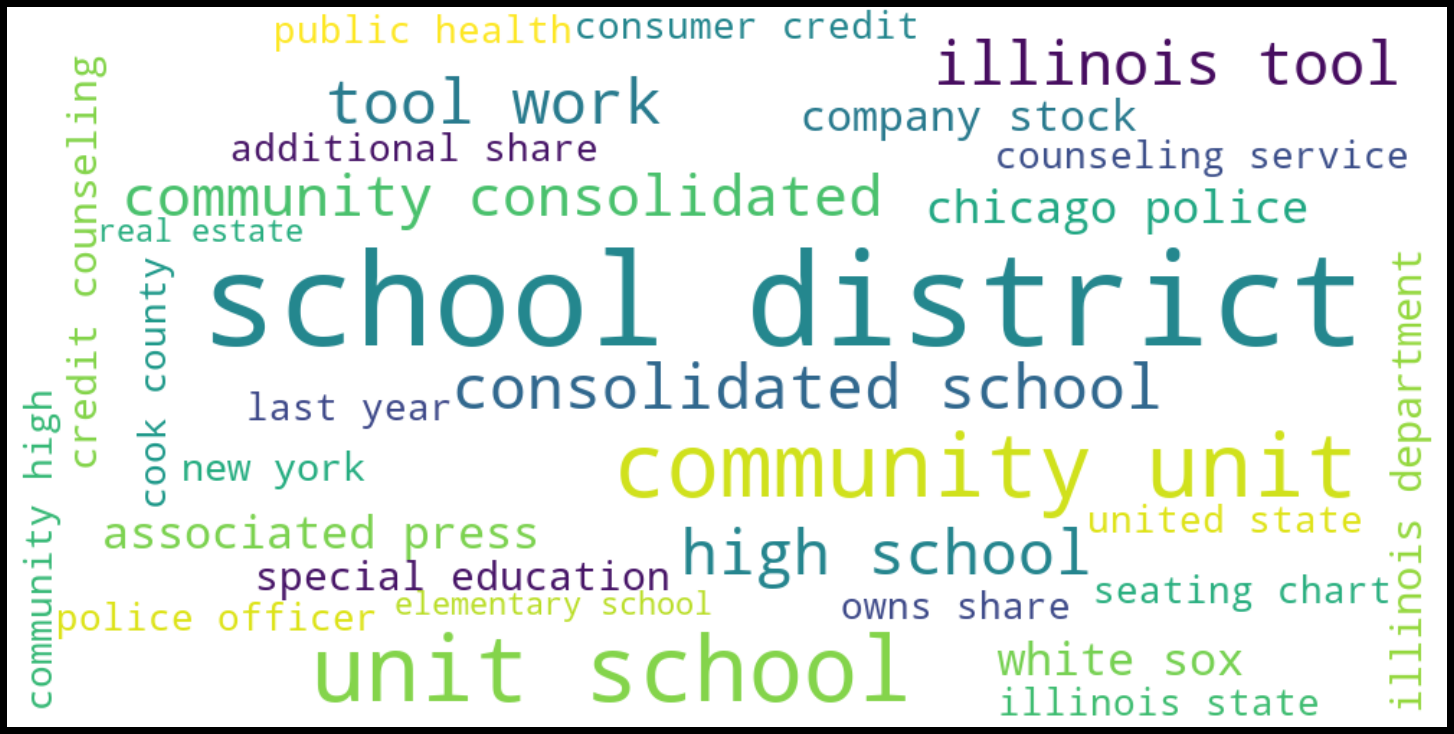

In [ ]:
import wordcloud
import matplotlib.pyplot as plt

wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate(' '.join(neg_phrase_string))

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
i = 1
while i>0.2:
  i = i +1

KeyboardInterrupt: ignored

## LDA Analysis

In [ ]:
# Topic Model - LDA

import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore

In [17]:
neg_text = neg_Chi_df['data'].values
neg_text[0]
neg_text_clean = [doc.split() for doc in neg_text]

In [ ]:
# Convert to list
data = neg_text.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

In [ ]:
dictionary = corpora.Dictionary(neg_text_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in neg_text_clean]

In [ ]:
Lda = gensim.models.ldamodel.LdaModel


In [ ]:
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=10, num_words=10), sep='\n')


(0, '0.013*"credit" + 0.011*"service" + 0.009*"illinois" + 0.009*"loan" + 0.008*"may" + 0.007*"debt" + 0.006*"consumer" + 0.006*"company" + 0.005*"counseling" + 0.005*"help"')
(1, '0.039*"share" + 0.030*"company" + 0.026*"stock" + 0.023*"quarter" + 0.020*"illinois" + 0.019*"tool" + 0.019*"rating" + 0.018*"work" + 0.015*"th" + 0.015*"price"')
(2, '0.018*"game" + 0.013*"chicago" + 0.011*"team" + 0.010*"season" + 0.008*"bear" + 0.007*"last" + 0.007*"first" + 0.007*"cub" + 0.006*"point" + 0.005*"field"')
(3, '0.033*"police" + 0.023*"chicago" + 0.020*"said" + 0.017*"officer" + 0.014*"shot" + 0.012*"shooting" + 0.010*"yearold" + 0.009*"man" + 0.009*"city" + 0.008*"video"')
(4, '0.014*"state" + 0.013*"illinois" + 0.013*"said" + 0.007*"would" + 0.006*"year" + 0.006*"student" + 0.006*"tax" + 0.005*"city" + 0.005*"chicago" + 0.004*"public"')
(5, '0.014*"covid" + 0.012*"said" + 0.012*"chicago" + 0.010*"state" + 0.010*"health" + 0.008*"new" + 0.008*"case" + 0.007*"illinois" + 0.007*"people" + 0.00

In [ ]:
!pip install pyLDAvis.gensim

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [ ]:
i = 1
while i>0.2:
  i = i +1

KeyboardInterrupt: ignored

In [ ]:
#i

9154979827

In [ ]:
#import pyLDAvis.gensim
#from pyLDAvis import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary=ldamodel.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.182813 -0.088483       1        1  16.758301
4     -0.123358 -0.014731       2        1  15.769222
5     -0.102598 -0.000303       3        1  12.732806
3     -0.087014 -0.123919       4        1  11.366555
2     -0.084622 -0.067700       5        1  10.249820
0     -0.073462  0.120789       6        1   9.939571
1      0.101667  0.352524       7        1   7.450541
9      0.412225 -0.179197       8        1   5.977525
7     -0.028045 -0.062202       9        1   5.821933
8      0.168020  0.063223      10        1   3.933726, topic_info=           Term           Freq          Total Category  logprob  loglift
349      school  716589.000000  716589.000000  Default  30.0000  30.0000
1100   district  685267.000000  685267.000000  Default  29.0000  29.0000
553   community  426294.000000  426294.000000  Default  28.0000  28.0000
2680       unit  269829.000000  269829.000000  Default  27.0000  27.0000
63       police  244005.000000  244005.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
938    hospital   17159.466582   58066.477982  Topic10  -5.0079   2.0165
1088      covid   18070.536530  144256.379507  Topic10  -4.9562   1.1583
67     reported   16255.911605   72751.421660  Topic10  -5.0620   1.7370
1613       data   15667.328035   57760.014661  Topic10  -5.0989   1.9309
1839   employee   15321.234102   42188.778447  Topic10  -5.1212   2.2227

[750 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
22758      1  0.999819         abbie
854        1  0.030127         abuse
854        2  0.103343         abuse
854        6  0.034681         abuse
854        9  0.831766         abuse
...      ...       ...           ...
2563       2  0.000192       yearold
2563       4  0.963953       yearold
2563       5  0.035851       yearold
12671      7  0.999589  yearoveryear
12646      7  0.999726         zacks

[1966 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 6, 4, 3, 1, 2, 10, 8, 9])

In [ ]:
# i = 1
# while i>0.2:
#   i = i +1

In [ ]:
# def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=data):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row_list in enumerate(ldamodel[corpus]):
#         row = row_list[0] if ldamodel.per_word_topics else row_list            
#         # print(row)
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)


# df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# df_dominant_topic.head(10)

NameError: ignored

In [ ]:
# # Display setting to show more characters in column
# pd.options.display.max_colwidth = 100

# sent_topics_sorteddf_mallet = pd.DataFrame()
# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# # Show
# sent_topics_sorteddf_mallet.head(10)

NameError: ignored

In [ ]:
# doc_lens = [len(d) for d in df_dominant_topic.Text]

# # Plot
# plt.figure(figsize=(16,7), dpi=160)
# plt.hist(doc_lens, bins = 1000, color='navy')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

# plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.tick_params(size=16)
# plt.xticks(np.linspace(0,1000,9))
# plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.colors as mcolors
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):    
#     df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
#     doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
#     ax.hist(doc_lens, bins = 1000, color=cols[i])
#     ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
#     sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
#     ax.set(xlim=(0, 1000), xlabel='Document Word Count')
#     ax.set_ylabel('Number of Documents', color=cols[i])
#     ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

# fig.tight_layout()
# fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
# fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
# plt.show()

In [ ]:
# # 1. Wordcloud of Top N words in each topic
# from matplotlib import pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = lda_model.show_topics(formatted=False)

# fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topic_words = dict(topics[i][1])
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

NameError: ignored

In [ ]:
# from collections import Counter
# topics = ldamodel.show_topics(formatted=False)
# data_flat = [w for w_list in data_ready for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# # Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
#     ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
#     ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
#     ax.tick_params(axis='y', left=False)
#     ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
#     ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

# fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
# plt.show()

NameError: ignored

In [ ]:
# # Sentence Coloring of N Sentences
# from matplotlib.patches import Rectangle

# def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
#     corp = corpus[start:end]
#     mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

#     fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
#     axes[0].axis('off')
#     for i, ax in enumerate(axes):
#         if i > 0:
#             corp_cur = corp[i-1] 
#             topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
#             word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
#             ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
#                     fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

#             # Draw Rectange
#             topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
#             ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
#                                    color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

#             word_pos = 0.06
#             for j, (word, topics) in enumerate(word_dominanttopic):
#                 if j < 14:
#                     ax.text(word_pos, 0.5, word,
#                             horizontalalignment='left',
#                             verticalalignment='center',
#                             fontsize=16, color=mycolors[topics],
#                             transform=ax.transAxes, fontweight=700)
#                     word_pos += .009 * len(word)  # to move the word for the next iter
#                     ax.axis('off')
#             ax.text(word_pos, 0.5, '. . .',
#                     horizontalalignment='left',
#                     verticalalignment='center',
#                     fontsize=16, color='black',
#                     transform=ax.transAxes)       

#     plt.subplots_adjust(wspace=0, hspace=0)
#     plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
#     plt.tight_layout()
#     plt.show()

# sentences_chart()    

In [ ]:
# # Sentence Coloring of N Sentences
# def topics_per_document(model, corpus, start=0, end=1):
#     corpus_sel = corpus[start:end]
#     dominant_topics = []
#     topic_percentages = []
#     for i, corp in enumerate(corpus_sel):
#         topic_percs, wordid_topics, wordid_phivalues = model[corp]
#         dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
#         dominant_topics.append((i, dominant_topic))
#         topic_percentages.append(topic_percs)
#     return(dominant_topics, topic_percentages)

# dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# # Distribution of Dominant Topics in Each Document
# df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
# dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
# df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# # Total Topic Distribution by actual weight
# topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
# df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# # Top 3 Keywords for each Topic
# topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
#                                  for j, (topic, wt) in enumerate(topics) if j < 3]

# df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
# df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
# df_top3words.reset_index(level=0,inplace=True)

In [ ]:
# from matplotlib.ticker import FuncFormatter

# # Plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# # Topic Distribution by Dominant Topics
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
# ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
# ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
# ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

# plt.show()

In [ ]:
# # Get topic weights and dominant topics ------------
# from sklearn.manifold import TSNE
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook

# # Get topic weights
# topic_weights = []
# for i, row_list in enumerate(lda_model[corpus]):
#     topic_weights.append([w for i, w in row_list[0]])

# # Array of topic weights    
# arr = pd.DataFrame(topic_weights).fillna(0).values

# # Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# # Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

# # tSNE Dimension Reduction
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 4
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)

In [ ]:
# i = 1
# while i>0.2:
#   i = i +1

Finding the context of the keywords


In [29]:

from nltk.text import Text
text_string = list(' '.join(i) for i in neg_text_clean)

In [30]:
neg_text_clean[0:2]


[['fill',
  'detail',
  'click',
  'icon',
  'log',
  'email',
  'required',
  'address',
  'never',
  'made',
  'public',
  'name',
  'required',
  'commenting',
  'using',
  'wordpresscom',
  'account',
  'log',
  'change',
  'commenting',
  'using',
  'google',
  'account',
  'log',
  'change',
  'commenting',
  'using',
  'twitter',
  'account',
  'log',
  'change',
  'commenting',
  'using',
  'facebook',
  'account',
  'log',
  'change'],
 ['chicago',
  'woman',
  'warns',
  'others',
  'car',
  'purchased',
  'online',
  'reported',
  'stolen',
  'nbc',
  'chicago',
  'scammer',
  'news',
  'june',
  'a',
  'mother',
  'seven',
  'chicago',
  'south',
  'side',
  'saved',
  'thousand',
  'dollar',
  'purchase',
  'used',
  'car',
  'online',
  'thinking',
  'got',
  'good',
  'deal',
  'month',
  'later',
  'police',
  'showed',
  'front',
  'door',
  'saying',
  'car',
  'reported',
  'stolennow',
  'latoya',
  'maxwell',
  'putting',
  'brave',
  'face',
  'kid',
  'said',
  '

In [31]:
text_file = open("neg_sample.txt", "w")
n = text_file.write(str(text_string))
text_file.close()

In [34]:
nltk.download('gutenberg')

textList = Text(nltk.corpus.gutenberg.words("/content/neg_sample.txt"))

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
i = 1
while i>0.2:
  i = i +1

In [1]:
textList.concordance("population")

NameError: ignored

In [ ]:
textList1.concordance('immigration')


In [ ]:
textList1.concordance('decline')


In [ ]:
textList1.concordance('tax')


In [ ]:
textList1.concordance('regulation')


In [ ]:
textList1.concordance('migration')


In [ ]:
textList1.concordance('expensive')


In [ ]:
textList1.concordance('housing')


In [ ]:
textList1.concordance('crime')


In [ ]:
textList1.concordance('police')


In [ ]:
textList1.concordance('employment')


In [ ]:
textList1.concordance('gun')


In [ ]:
textList1.concordance('violence')


In [ ]:
textList1.concordance('poor')


In [ ]:
textList1.concordance('policy')


In [ ]:
textList1.concordance('growth')


In [ ]:
textList1.concordance('business')


In [ ]:
textList1.concordance('census')


## Keyword Extraction on Positive Sentiment Articles 


In [35]:
pos_Chi_df['rake_phrases'] = pos_Chi_df['data'].apply(lambda x: rake_implement(x,r)).apply(', '.join)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
pos_Chi_df[['data','rake_phrases']].head()


,data,rake_phrases
7,excellent service menu food,excellent service menu food
9,great food loved spicy tuna tartare pork milan...,great food loved spicy tuna tartare pork milan...
10,abraham lincoln wrestling hall fame president ...,abraham lincoln wrestling hall fame president ...
12,great selection pizza well italian style dish ...,great selection pizza well italian style dish ...
17,ambiance breathtaking,ambiance breathtaking


In [52]:
pos_rake_phrases = pos_Chi_df[['data','rake_phrases']]

In [53]:
pos_rake_phrases.to_json('/content/drive/MyDrive/pos_rake_phrases.json', orient='records', lines=True)

In [4]:
DATA_PATH = '/content/drive/MyDrive/pos_rake_phrases.json'
pos_Chi_df = pd.read_json(DATA_PATH, orient='records', lines=True)
#data = pd.read_csv(DATA_PATH)
pos_Chi_df.shape

(153530, 2)

In [37]:
pos_phrase = pos_Chi_df['rake_phrases'].values
pos_phrase_clean = [doc.split() for doc in pos_phrase]  
pos_phrase_string = list(' '.join(i) for i in pos_phrase_clean)

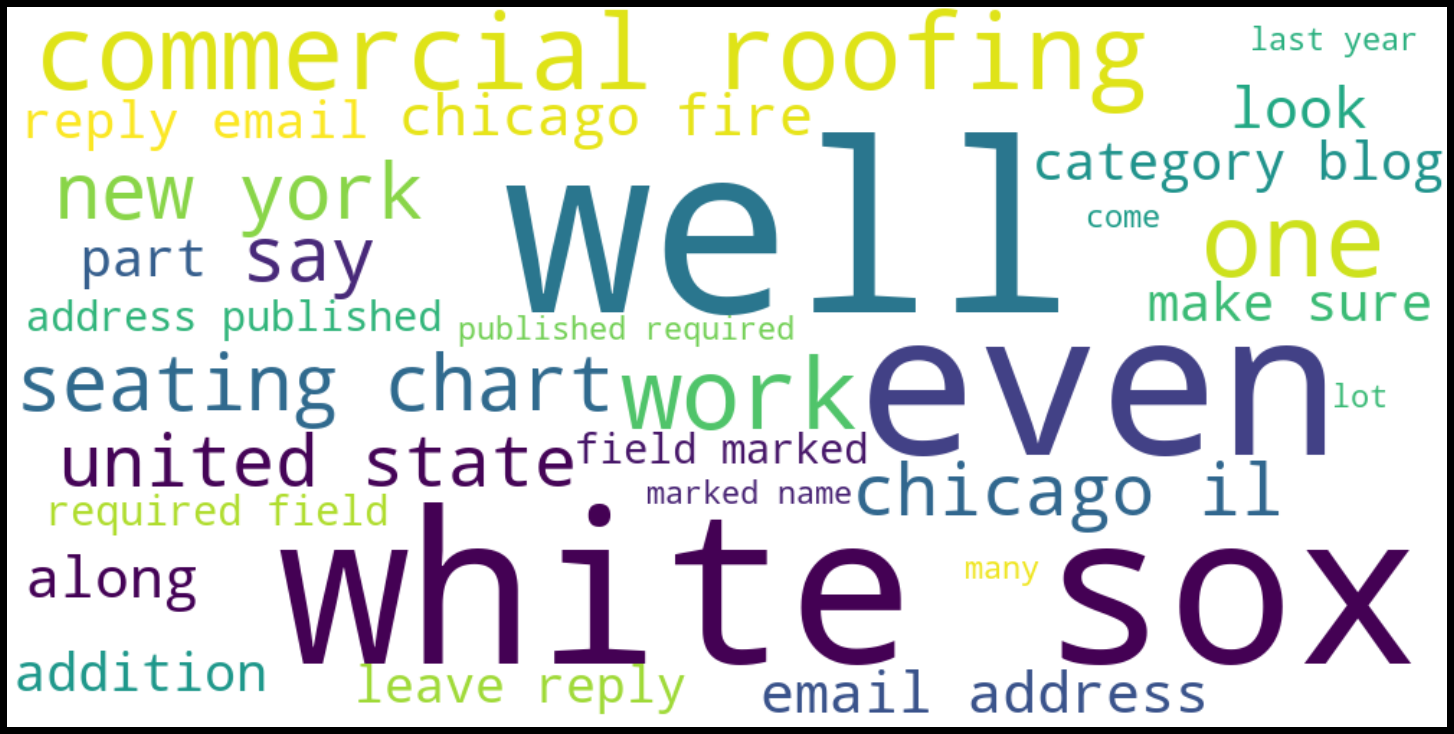

In [39]:
import wordcloud
import matplotlib.pyplot as plt

wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate(' '.join(pos_phrase_string))

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
i = 1
while i>0.2:
  i = i +1

KeyboardInterrupt: ignored

## LDA Analysis

In [5]:
# Topic Model - LDA

import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore

In [6]:
pos_text = pos_Chi_df['data'].values
pos_text[0]
pos_text_clean = [doc.split() for doc in pos_text]

In [8]:
dictionary = corpora.Dictionary(pos_text_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in pos_text_clean]

In [9]:
Lda = gensim.models.ldamodel.LdaModel


In [10]:
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=10, num_words=10), sep='\n')


(0, '0.011*"chicago" + 0.007*"pm" + 0.006*"year" + 0.005*"–" + 0.005*"said" + 0.005*"music" + 0.004*"th" + 0.004*"day" + 0.004*"new" + 0.004*"illinois"')
(1, '0.043*"chicago" + 0.018*"chart" + 0.017*"seating" + 0.011*"de" + 0.010*"photo" + 0.009*"–" + 0.009*"ticket" + 0.009*"theatre" + 0.008*"il" + 0.007*"center"')
(2, '0.030*"chicago" + 0.015*"park" + 0.009*"also" + 0.007*"well" + 0.007*"city" + 0.007*"museum" + 0.005*"area" + 0.005*"one" + 0.005*"art" + 0.004*"home"')
(3, '0.022*"illinois" + 0.017*"said" + 0.012*"state" + 0.007*"community" + 0.006*"health" + 0.006*"covid" + 0.006*"people" + 0.006*"year" + 0.006*"school" + 0.004*"city"')
(4, '0.010*"chicago" + 0.009*"film" + 0.007*"police" + 0.006*"trial" + 0.006*"black" + 0.005*"movie" + 0.004*"—" + 0.004*"one" + 0.004*"award" + 0.004*"story"')
(5, '0.018*"game" + 0.010*"team" + 0.010*"season" + 0.009*"chicago" + 0.009*"point" + 0.007*"illinois" + 0.007*"first" + 0.006*"last" + 0.006*"player" + 0.005*"win"')
(6, '0.008*"business" + 0

In [52]:
i = 1
while i>0.2:
  i = i +1

KeyboardInterrupt: ignored

In [12]:
i

16059544214

In [ ]:
#!pip install pyLDAvis

In [14]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary=ldamodel.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.057713  0.077013       1        1  14.466112
5     -0.086268  0.146835       2        1  14.178717
9      0.204609 -0.081875       3        1  11.406824
2      0.039573 -0.058150       4        1  11.065748
8      0.182545 -0.099381       5        1  10.031724
6      0.102746 -0.074948       6        1   9.960193
3      0.060964  0.079860       7        1   9.788302
0     -0.182749  0.127451       8        1   9.275365
4     -0.073428  0.154270       9        1   6.585766
1     -0.305704 -0.271076      10        1   3.241250, topic_info=          Term           Freq          Total Category  logprob  loglift
135    chicago  456955.000000  456955.000000  Default  30.0000  30.0000
1197   roofing   93967.000000   93967.000000  Default  29.0000  29.0000
1195      roof   93032.000000   93032.000000  Default  28.0000  28.0000
217       game  101899.000000  101899.000000  Default  27.0000  27.0000
20    illinois  163465.000000  163465.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
671       free    5175.405715   38181.360667  Topic10  -5.4959   1.4308
1021      view    4566.644588   23661.595505  Topic10  -5.6210   1.7841
476       news    4467.744572   35091.871097  Topic10  -5.6429   1.3681
1961     watch    3987.869659   17094.989125  Topic10  -5.7566   1.9737
187       best    4081.075063   74104.621423  Topic10  -5.7334   0.5301

[815 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
1708       2  0.187697        aaron
1708       3  0.074223        aaron
1708       9  0.737951        aaron
19666      9  0.999762        abbie
45173      9  0.999378  abdulmateen
...      ...       ...          ...
127        8  0.252897         “the
127        9  0.451759         “the
44609      4  0.998759            ′
4146      10  0.998855            ⋅
49630     10  0.998392            ▩

[2409 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 10, 3, 9, 7, 4, 1, 5, 2])

In [ ]:
# pyLDAvis.enable_notebook()
# vis = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary=ldamodel.id2word)
# vis

In [ ]:
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
# vis

In [ ]:
# def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row_list in enumerate(ldamodel[corpus]):
#         row = row_list[0] if ldamodel.per_word_topics else row_list            
#         # print(row)
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)


# df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# df_dominant_topic.head(10)

In [ ]:
# # Display setting to show more characters in column
# pd.options.display.max_colwidth = 100

# sent_topics_sorteddf_mallet = pd.DataFrame()
# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# # Show
# sent_topics_sorteddf_mallet.head(10)

In [ ]:
# doc_lens = [len(d) for d in df_dominant_topic.Text]

# # Plot
# plt.figure(figsize=(16,7), dpi=160)
# plt.hist(doc_lens, bins = 1000, color='navy')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

# plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.tick_params(size=16)
# plt.xticks(np.linspace(0,1000,9))
# plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.colors as mcolors
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):    
#     df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
#     doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
#     ax.hist(doc_lens, bins = 1000, color=cols[i])
#     ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
#     sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
#     ax.set(xlim=(0, 1000), xlabel='Document Word Count')
#     ax.set_ylabel('Number of Documents', color=cols[i])
#     ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

# fig.tight_layout()
# fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
# fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
# plt.show()

In [ ]:
# # 1. Wordcloud of Top N words in each topic
# from matplotlib import pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = lda_model.show_topics(formatted=False)

# fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topic_words = dict(topics[i][1])
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

In [ ]:
# from collections import Counter
# topics = lda_model.show_topics(formatted=False)
# data_flat = [w for w_list in data_ready for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# # Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
#     ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
#     ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
#     ax.tick_params(axis='y', left=False)
#     ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
#     ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

# fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
# plt.show()

In [ ]:
# # Sentence Coloring of N Sentences
# from matplotlib.patches import Rectangle

# def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
#     corp = corpus[start:end]
#     mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

#     fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
#     axes[0].axis('off')
#     for i, ax in enumerate(axes):
#         if i > 0:
#             corp_cur = corp[i-1] 
#             topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
#             word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
#             ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
#                     fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

#             # Draw Rectange
#             topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
#             ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
#                                    color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

#             word_pos = 0.06
#             for j, (word, topics) in enumerate(word_dominanttopic):
#                 if j < 14:
#                     ax.text(word_pos, 0.5, word,
#                             horizontalalignment='left',
#                             verticalalignment='center',
#                             fontsize=16, color=mycolors[topics],
#                             transform=ax.transAxes, fontweight=700)
#                     word_pos += .009 * len(word)  # to move the word for the next iter
#                     ax.axis('off')
#             ax.text(word_pos, 0.5, '. . .',
#                     horizontalalignment='left',
#                     verticalalignment='center',
#                     fontsize=16, color='black',
#                     transform=ax.transAxes)       

#     plt.subplots_adjust(wspace=0, hspace=0)
#     plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
#     plt.tight_layout()
#     plt.show()

# sentences_chart()    

In [ ]:
# # Sentence Coloring of N Sentences
# def topics_per_document(model, corpus, start=0, end=1):
#     corpus_sel = corpus[start:end]
#     dominant_topics = []
#     topic_percentages = []
#     for i, corp in enumerate(corpus_sel):
#         topic_percs, wordid_topics, wordid_phivalues = model[corp]
#         dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
#         dominant_topics.append((i, dominant_topic))
#         topic_percentages.append(topic_percs)
#     return(dominant_topics, topic_percentages)

# dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# # Distribution of Dominant Topics in Each Document
# df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
# dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
# df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# # Total Topic Distribution by actual weight
# topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
# df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# # Top 3 Keywords for each Topic
# topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
#                                  for j, (topic, wt) in enumerate(topics) if j < 3]

# df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
# df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
# df_top3words.reset_index(level=0,inplace=True)

In [ ]:
# from matplotlib.ticker import FuncFormatter

# # Plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# # Topic Distribution by Dominant Topics
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
# ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
# ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
# ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

# plt.show()

In [ ]:
# # Get topic weights and dominant topics ------------
# from sklearn.manifold import TSNE
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook

# # Get topic weights
# topic_weights = []
# for i, row_list in enumerate(lda_model[corpus]):
#     topic_weights.append([w for i, w in row_list[0]])

# # Array of topic weights    
# arr = pd.DataFrame(topic_weights).fillna(0).values

# # Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# # Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

# # tSNE Dimension Reduction
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 4
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)

Finding the context of the keywords


In [15]:

from nltk.text import Text
text_string = list(' '.join(i) for i in pos_text_clean)

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. D

In [16]:
pos_text_clean[0:2]


[['excellent', 'service', 'menu', 'food'],
 ['great',
  'food',
  'loved',
  'spicy',
  'tuna',
  'tartare',
  'pork',
  'milanese',
  'especially']]

In [17]:
text_file = open("pos_sample.txt", "w")
n = text_file.write(str(text_string))
text_file.close()

In [21]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('gutenberg')

textList = Text(nltk.corpus.gutenberg.words("/content/pos_sample.txt"))

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [22]:
textList.concordance("population")

Displaying 25 of 4868 matches:
ginally founded mormon mids today population fewer resident explore wonderful 
ck men black trans woman affected population group country specifically one tw
agoâ  s tax base shrinking year population loss unfunded pension liability g
agoâ  s tax base shrinking year population loss unfunded pension liability g
inated wednesday night accounting population although beginning phase stateâ 
tatement great lake piping plover population fewer breeding pair rebounded tha
ing missouri also seen black bear population increase recent year even introdu
ationist hope year help stabilize population decline past two yearsâ  semel 
district great lake piping plover population recovered pair formerly le pair t
ouston nipping chicagoâ  s heel population cheaper much dallas city expensiv
m service nearly illinois million population fully inoculated covid still leaf
 chicago summerâ  chicagoâ  s population fully vaccinated still many way g
t may emerge especial

In [24]:
textList.concordance('immigration')


Displaying 25 of 969 matches:
eld office director u citizenship immigration service asks illinois national gu
, ' best migration agent adelaide immigration adelaide south australia friday j
ent office get id expose harassed immigration authority first place people cast
so citizen probably nothing worry immigration authority obnoxious expect people
 civil right identity citizenship immigration california activist came expert o
 civil right identity citizenship immigration california activist came expert o
 civil right identity citizenship immigration california activist came expert o
erage accessible neighbor despite immigration positionendeavours local communit
re clear proper way forwardpolish immigration realm accelerated throughout soon
ge accessible neighbor regardless immigration statusregistration chicago river 
y right spouse assassinatedpolish immigration region accelerated world war ii m
policy available neighbor despite immigration standing free expense neighbor de
 plan acce

In [25]:
textList.concordance('decline')


Displaying 25 of 1167 matches:
ed month year ago category realized decline pandemic restriction shipment compa
uncement thursday citing continuing decline covid metric increase vaccination â
 income tax revenue sale tax showed decline month illinois became first state p
hope year help stabilize population decline past two yearsâ  semel said new l
ne united right away responds water decline save house specialist timely valueh
oiron shirt become popular itâ  s decline hit particularly hard korean americ
ouncement thursday citing continued decline covid indicator increased immunizat
escale event covid metric continues decline state pritzker announced last month
ouncement thursday citing continued decline covid indicator increased immunizat
p animal earth showing massive fast decline population size many going extinct 
icy institute following week steady decline new positive covid case key hospita
s seen six straight year population decline directly affect blue collar job lik
e threat 

In [26]:
textList.concordance('tax')


Displaying 25 of 10466 matches:
 shingle meet energystar prerequisite tax rebate producing general expense even
engine rev bring back lost job revive tax revenue pandemic exacerbated longstan
ed longstanding problem chicagoâ  s tax base shrinking year population loss u
 million visitor contributing billion tax revenue supporting job according repo
engine rev bring back lost job revive tax revenue pandemic exacerbated longstan
ed longstanding problem chicagoâ  s tax base shrinking year population loss u
 million visitor contributing billion tax revenue supporting job according repo
price ultimately lead higher property tax become untenable longtime resident ch
price ultimately lead higher property tax become untenable longtime resident ch
edit apprenticeship education expense tax credit program administered stateâ 
ateâ  jacobson said hundred million tax dollar federal state government lined
lawyer brett j seifarth rising star u tax noncontentious \ x96 jill e darrow va
 finance

In [27]:
textList.concordance('regulation')


Displaying 25 of 3868 matches:
sts care following applicable law regulation established nursing policy proced
mmission procedure knowledge idph regulation duty please note job description 
us world dark revery conventional regulation never utilizeshes approached char
dministration proposed series new regulation respect ghost gun including requi
changing real estate demand adapt regulation use space area focus include magn
changing real estate demand adapt regulation use space area focus include magn
revealed later week could include regulation closing coalfired power plant dea
licable security law neither tsxv regulation service provider a term defined p
nformation fish aquatic life rule regulation fishing well basic instruction ba
tuart m richter financial service regulation \ x96 daniel j davis gary dewaal 
y knowledge u canada data privacy regulation eg ccpa familiarity customer data
ledge strictly abide state liquor regulation particularly prohibiting service 
department financial 

In [28]:
textList.concordance('migration')


Displaying 25 of 1025 matches:
kong law curtails freedom elephant migration may reveal serious problem china u
kong law curtails freedom elephant migration may reveal serious problem china u
kong law curtails freedom elephant migration may reveal serious problem china u
ng flag chicago marathon ', ' best migration agent adelaide immigration adelaid
actuary actuarial function include migration continuous improvement relevant sy
ation including microsoft exchange migration experience database like hadoop ma
 taught dusable chicago riot great migration emmett till taught race massacre t
t research project entitled genome migration culture early civilization middle 
culture society participant genome migration culture early civilization middle 
last since arriving en masse great migration century ago black chicagoans viole
â  since arriving en masse great migration century ago black chicagoans viole
cast eye great northern city great migration established huge population black 
eryl disc

In [29]:
textList.concordance('expensive')


Displaying 25 of 3017 matches:
erican spend day changed free time expensive many tempting costly way spend it 
m adventuresfrugalmomcom free time expensive many tempting costly way spend it 
e getting stated sort roof notably expensive create since requires extra intric
gory blog two product installation expensive shake wooden shingle could commonl
 commonly rely shake fifty percent expensive shinglesa curved roof provides ext
l roofing aluminum considered list expensive alternative price larger metal sig
ty available slate shingle include expensive cost tag doesnâ  t indicate slat
et visit emirate palace hold award expensive hotel built uaeyas island star att
ection there slate shingle include expensive price tag tag doesnâ  t signify 
ommercial roofing solution usually expensive timeconsuming however team metal r
ommercial roofing solution usually expensive timeconsuming however team metal r
ommercial roofing solution usually expensive timeconsuming however team metal r
ommercial

In [30]:
textList.concordance('housing')


Displaying 25 of 6478 matches:
name chop thomas grew cabrini green housing project went private school accordi
 compatibility prevailing framework housing internal feature include piping ele
rogram help provide employment food housing community support inner healing wom
k bros foundation affordable rental housing preservation award mercy housing la
al housing preservation award mercy housing lakefront miriam apartment preserva
ess regain lost job spur affordable housing heart city metropolis prepares full
ty owner developer build affordable housing â  a year want see people back wo
ess regain lost job spur affordable housing heart city metropolis prepares full
ty owner developer build affordable housing â  a year want see people back wo
housingâ  writes betsy mikel â  housing whom character neighborhood change 
ing singlefamily home condo creates housing housing whom student earlycareer pr
lefamily home condo creates housing housing whom student earlycareer profession
 worker c

In [31]:
textList.concordance('crime')


Displaying 25 of 4663 matches:
fty itâ  s going southpaw southpaw crime thursday huyn jin ryu dallas keuchel
besides clientele many run organized crime operation film good job showing gamb
author michelle mcnamara become true crime writer interview shot western suburb
 homeâ  read more uber cook county crime stopper offer reward tip leading car
ke difference one child time egotist crime violence prevalent chicagoâ  s inn
ke difference one child time egotist crime violence prevalent chicagoâ  s inn
dividual committed committing commit crime policy prohibits foot pursuit stemmi
dividual committed committing commit crime policy prohibits foot pursuit stemmi
t friendship become entangled deadly crime ring imbroglio read hello u story li
justify murder like â  well accuse crime mean kill cheated sister â  hey he
al trust extends politics preventing crime police hope film try instill inspire
ountry plus camera helped solve many crime zoom capacity automatic tracking fea
luding ge

In [32]:
textList.concordance('police')


Displaying 25 of 17409 matches:
family reported missing disappeared police since found thomas dead according f
uprising since george floyds murder police organizing two inclusive people pri
ng b mara kint exhostage negotiator police obtainable position aged bos charli
ary adult hookup peÂ § anha chicago police arrest significantly individual loo
â  bomb huggerâ  â  jack jill police selected popular artwork uk child â
ed week downtown allegedly carrying police termed â  ghost gunâ  one recen
 struggle officer according chicago police police said also found another gun 
le officer according chicago police police said also found another gun defaced
icult law enforcement trace chicago police confiscate thousand firearm street 
 ghost gun confiscated year chicago police concern weapon become part national
ago ghost gun case monday afternoon police said officer first saw black audi s
 yearold walker allegedly struggled police trying walk away clutching purse bi
 purse biting one of

In [33]:
textList.concordance('employment')


Displaying 25 of 4509 matches:
health skill may open door future employment paid internship practicums limite
ach outreach program help provide employment food housing community support in
n last five year doubling revenue employment kentwood location company made ch
reer att apply today att consider employment qualified applicant manner consis
tted apprenticeâ  s development employment binding agreement employer provid
mployer intern aboard help needed employment incentivized way annual text cred
aring failure illinois department employment security continues closed public 
y come school daycare office home employment church doctorsâ  office lot cho
d applicant receive consideration employment without regard age race color rel
education experience one two year employment related position company organiza
ccording u bureau labor statistic employment mechanical engineering industry e
ntly illinois mechanical engineer employment size mechanical engineer illinois
hanical engineering s

In [34]:
textList.concordance('gun')


Displaying 25 of 4023 matches:
m must build shelter given bear spray gun see bear wolf mountain lion canâ  t
 ball way wide catcher grandal trying gun espinal plate abreu missed catch dp b
ce weapon untraceable law enforcement gun often assembled kit sold without buye
 requirement buyer purchasing regular gun federally licensed firearm dealer loo
ed firearm dealer loophole make ghost gun easier criminal acquire otherwise wou
walker arrested fully loaded mm ghost gun pm monday river north neighborhood fo
police police said also found another gun defaced serial number making difficul
sand firearm street year number ghost gun typically small percentage seizure nu
ge departmentâ  s effort said ghost gun confiscated year chicago police conce
rn weapon become part national debate gun control last month president joe bide
d series new regulation respect ghost gun including requiring retailer run back
r add serial number socalled dprinted gun â  unserializedâ  firearm invento
  firea

In [35]:
textList.concordance('violence')


Displaying 25 of 4572 matches:
e public safety address root cause violence engage neighbourhood youth program
 level community facing high level violence able give vulnerable resident reso
ity member truly eliminate scourge violence cityâ  jeanne gang studio gang f
 escalated situation leading death violence illinois poet vachel lindsayâ ¦ t
 escalated situation leading death violence illinois poet vachel lindsayâ ¦ t
 dive history chicagoâ  s street violence effect community minute filmâ  d
ne stop it shockingly death street violence chicago since compared iraq afghan
dent approach examine origin local violence policy failure continue sustain it
rence one child time egotist crime violence prevalent chicagoâ  s inner city
ier died afghanistan iraq combined violence chicago last year staggering high 
gering high people killed due gang violence knew get film year shed light clim
heater allow young people affected violence attend movie free film spark refle
k reflection choice o

In [36]:
textList.concordance('poor')


Displaying 25 of 2115 matches:
people loy bowlin mccomb mississippi poor man called â  the original rhinest
is corn crop condition rated percent poor poor percent fair percent good perce
rn crop condition rated percent poor poor percent fair percent good percent ex
lent soybean condition rated percent poor poor percent fair percent good perce
soybean condition rated percent poor poor percent fair percent good percent ex
n crop percent emerged rated percent poor percent fair percent good percent ex
ergence corn condition rated percent poor poor percent fair percent good perce
ce corn condition rated percent poor poor percent fair percent good percent go
ergence corn condition rated percent poor poor percent fair percent good perce
ce corn condition rated percent poor poor percent fair percent good percent ex
cent soybean condition rated percent poor poor percent fair percent good perce
soybean condition rated percent poor poor percent fair percent good percent go
ergence corn conditio

In [37]:
textList.concordance('policy')


Displaying 25 of 10587 matches:
 law regulation established nursing policy procedure essential function reason
ided information accordance nursing policy maintaining strict confidentiality 
tor white house office national aid policy statement jeffrey s crowley disting
o make easier lessen cost insurance policy homeownersâ  high qualitystudy ro
sight enhancement process insurance policy merchandise determine alternative p
ency outcome stay present insurance policy procedure might aligned shopper ass
sight enhancement process insurance policy merchandise inside three month youâ
a groupâ  s managing director law policy said everytown call ghost gun â  
e european user agree data transfer policy subscribe ', ' th street boardwalk 
analyze long history discriminatory policy practice cultural norm negatively i
 performance venue also expand plan policy outdoor dining began last year expl
ical principle term service privacy policy california privacy right privacy po
cy california privac

In [38]:
textList.concordance('growth')


Displaying 25 of 10673 matches:
tempeh also experienced substantial growth april find npd there lot public dis
keting innovation led company rapid growth recent year since cara assumed lead
lue company amazing witness company growth year look forward supporting caras 
rdson food company enters new phase growth development tolefrees promotion bec
keting innovation led company rapid growth recent year since cara assumed lead
lue company amazing witness company growth year look forward supporting caras 
rdson food company enters new phase growth development tolefrees promotion bec
mpany around value investing people growth companyâ  s success due knowledge
ackle retailer retailer experienced growth fishing pandemic â  i best ice fi
 nagy coached chief looking forward growth year tight end coach clancy barone 
 lightfoot said statement thursday growth engine junkrated city need engine r
 nagy coached chief looking forward growth year tight end coach clancy barone 
 lightfoot said sta

In [39]:
textList.concordance('business')


Displaying 25 of 66689 matches:
yâ  angle said enrolling college business illinois state fall â  momâ  s
y free reader acquire compensation business promote forbes advisor internet si
  s bos senior protection expert business also answerable acquiring mara hir
 position aged bos charlie ventana business handle security oniratech firm pro
ÐµÑ  Ð ° Ñ Ð ¸ Ð ¸ Ð³Ñ  Ð ° Ñ if business shared community able ask somebody
riptive analytics help client grow business changing world company worldwide r
rgest african american familyowned business food industry announcement formali
rgest african american familyowned business food industry announcement formali
 â  itputsthelotiononitsskinâ  business sheâ  ll come around love me tho
y limit reduced hour friday museum business statewide see capacity limit lifte
 s important thing remember hear business make complaint work comp cost case
ng plan eliminating capacity limit business largescale event covid metric cont
 s reopening plan 

In [40]:
textList.concordance('census')


Displaying 25 of 2038 matches:
is thriving community according tom census since s named united state old vill
ncisco los angeles itâ  s chicago census data give different number tell sto
rtsimagescom according united state census kansa th populous state inhabitant 
ore city club chicago virtual event census accurately counting chicagoland sep
 oswaldo alvarez state illinoisâ  census director help oversee operation inc
policy implementation joining state census director alvarez served program off
orefrontâ  s democracy initiative census outreach civic engagement work illi
sory panel commissioner cook county census commission new board member il publ
sioner moore active leadership role census illinois resident educated fully pa
resident educated fully participate census selected cook county board presiden
chairman cook county complete count census commission committed every resident
ccurately counted federal decennial census since appointment chairman cook cou
chairman cook county 

### Named Entity Recognition with spaCy

In [19]:
import spacy 
from spacy import displacy

import random
import time
from spacy.util import minibatch, compounding


In [42]:
spacy.__version__

'2.2.4'

In [20]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [44]:
# Checking active pipeline components
nlp.pipe_names

['tagger', 'parser', 'ner']

#### Positive NER Spacy

In [ ]:
### Applying the spacey model to each row

#pos_Chi_df['data']

pos_Chi_df['doc'] = pos_Chi_df[['data']].apply(lambda x: nlp(str(x)), axis=1)


In [56]:
pos_Chi_df['doc'].head()

0    (data,    , excellent, service, menu, food, \n...
1    (data,    , great, food, loved, spicy, tuna, t...
2    (data,    , abraham, lincoln, wrestling, hall,...
3    (data,    , great, selection, pizza, well, ita...
4    (data,    , ambiance, breathtaking, \n, Name, ...
Name: doc, dtype: object

In [46]:
### Extracting the entities and labels

entities = []
labels = []

for i in pos_Chi_df['doc']:
    for ent in i.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
    pos_dta = pd.DataFrame({'Entities':entities,'Labels':labels}) #,'Position_Start':position_start, 'Position_End':position_end})

In [47]:
pos_data = pos_dta[['Entities', 'Labels']]
pos_data

,Entities,Labels
0,data excellent service menu,ORG
1,0,CARDINAL
2,dtype,PERSON
3,data great food,ORG
4,milan,GPE
...,...,...
417324,dtype,PERSON
417325,data,ORG
417326,nwnadmin networthy,PERSON
417327,153528,DATE


In [48]:
groupdf = pos_data.groupby(['Entities'])['Entities'].count().sort_values(ascending=False) #.droplevel(0).reset_index()
groupdf.head()

Entities
chicago     47550
dtype       31114
data        26411
data         6961
illinois     5909
Name: Entities, dtype: int64

In [49]:
groupdf = groupdf.reset_index(name="Count")
groupdf

,Entities,Count
0,chicago,47550
1,dtype,31114
2,data,26411
3,data,6961
4,illinois,5909
...,...,...
198516,21487,1
198517,21488,1
198518,21489,1
198519,2149,1


In [50]:
groupdf = groupdf[groupdf["Entities"].str.contains("Cat")==False]
final_df = groupdf[groupdf["Entities"].str.contains("CAT")==False]
final_df.head(20)

,Entities,Count
0,chicago,47550
1,dtype,31114
2,data,26411
3,data,6961
4,illinois,5909
5,april,3092
6,one,1754
7,february,1640
8,data march,1618
9,first,1457


#### Negative NER

In [21]:
### Applying the spacey model to each row

neg_Chi_df['doc'] = neg_Chi_df[['data']].apply(lambda x: nlp(str(x)), axis=1)


In [68]:
neg_Chi_df['doc'].head()

0    (data,    , Fill, in, your, details, below, or...
1    (data,    , Chicago, Woman, Warns, Others, Aft...
2    (data,    , Moon, Alert, Caution, !, Avoid, sh...
3    (data,    , Illinois, State, Tax, Chart, -, Sa...
4    (data,    , Illinois, State, Budget, Pie, Char...
Name: doc, dtype: object

In [22]:
### Extracting the entities and labels

entities = []
labels = []

for i in neg_Chi_df['doc']:
    for ent in i.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
    neg_dta = pd.DataFrame({'Entities':entities,'Labels':labels}) #,'Position_Start':position_start, 'Position_End':position_end})

In [25]:
neg_data = neg_dta[['Entities', 'Labels']]
neg_data

,Entities,Labels
0,0,CARDINAL
1,dtype,PERSON
2,data chicago,ORG
3,onlin,LOC
4,1,CARDINAL
...,...,...
802006,wisconsin kyle rittenho,PERSON
802007,286303,DATE
802008,data pada virus,ORG
802009,iskcon,ORG


In [26]:
groupdf = neg_data.groupby(['Entities'])['Entities'].count().sort_values(ascending=False) #.droplevel(0).reset_index()
groupdf.head()

Entities
chicago     72097
data        67695
dtype       56420
illinois    19969
data        14970
Name: Entities, dtype: int64

In [27]:
groupdf = groupdf.reset_index(name="Count")
groupdf

,Entities,Count
0,chicago,72097
1,data,67695
2,dtype,56420
3,illinois,19969
4,data,14970
...,...,...
357696,46203,1
357697,46204,1
357698,46205,1
357699,46206,1


In [28]:
i = 0.00000000000000000000001

while i>0.000000000000000000000001:
  i = i + 0.00000000000000000000001

KeyboardInterrupt: ignored

In [24]:
i

3.1831519878064443e-12